<a href="https://colab.research.google.com/github/herr-hollis/Search-for-extraterrestrial-intelligence/blob/main/Search_for_extraterrestrial_intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [7]:
!pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00


In [13]:
import numpy as np
import astropy.io.fits as pf
#import astropy.io.fits as pyfits
#import pyfits as pf
import matplotlib
from matplotlib import pyplot as plt
import lmfit
from lmfit import minimize, Parameters, report_fit, fit_report
from IPython.display import Image

In [17]:
!wget = /content/ucb-amp194.fits copy
apf_file = pf.open('ucb-amp194.fits copy')

--2024-06-27 05:45:43--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
/content/ucb-amp194.fits: Scheme missing.
--2024-06-27 05:45:43--  http://copy/
Resolving copy (copy)... failed: Name or service not known.
wget: unable to resolve host address ‘copy’


In [19]:
header = apf_file[0].header
print(repr(header))

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2080 / NUMBER OF COLUMNS                              
NAXIS2  =                 4608 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                    0 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                    1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                  194 / OBSERVATION NUMBER                             
IDNUM   =                    3 / IMAGE ID                                       
UGEOM   =                    1 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

In [21]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

Right Ascension: 20:06:15.5
Declination:  44:27:24.6
Target Object: KIC8462852


In [22]:
image = apf_file[0].data

In [24]:
cookies = np.array([[1,2,3],[4,5,6]])
print(cookies)

[[1 2 3]
 [4 5 6]]


In [26]:
print(cookies[0,0])

1


Text(0.5, 1.0, '2D array data')

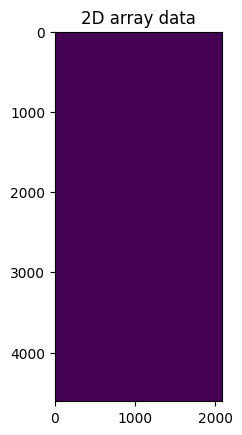

In [27]:
plt.imshow(image)
plt.title('2D array data')

Text(0.5, 1.0, '2D array data w/ contrast')

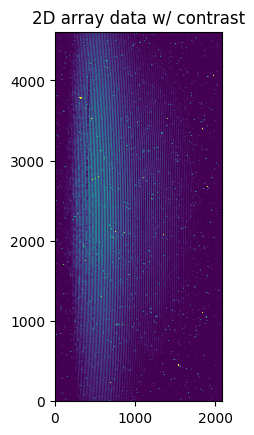

In [28]:
plt.imshow(image, vmin = np.median(image), vmax = np.median(image) * 1.2, origin = 'lower')
plt.title('2D array data w/ contrast')

Text(0.5, 1.0, '2D array w/ contrast and rotated')

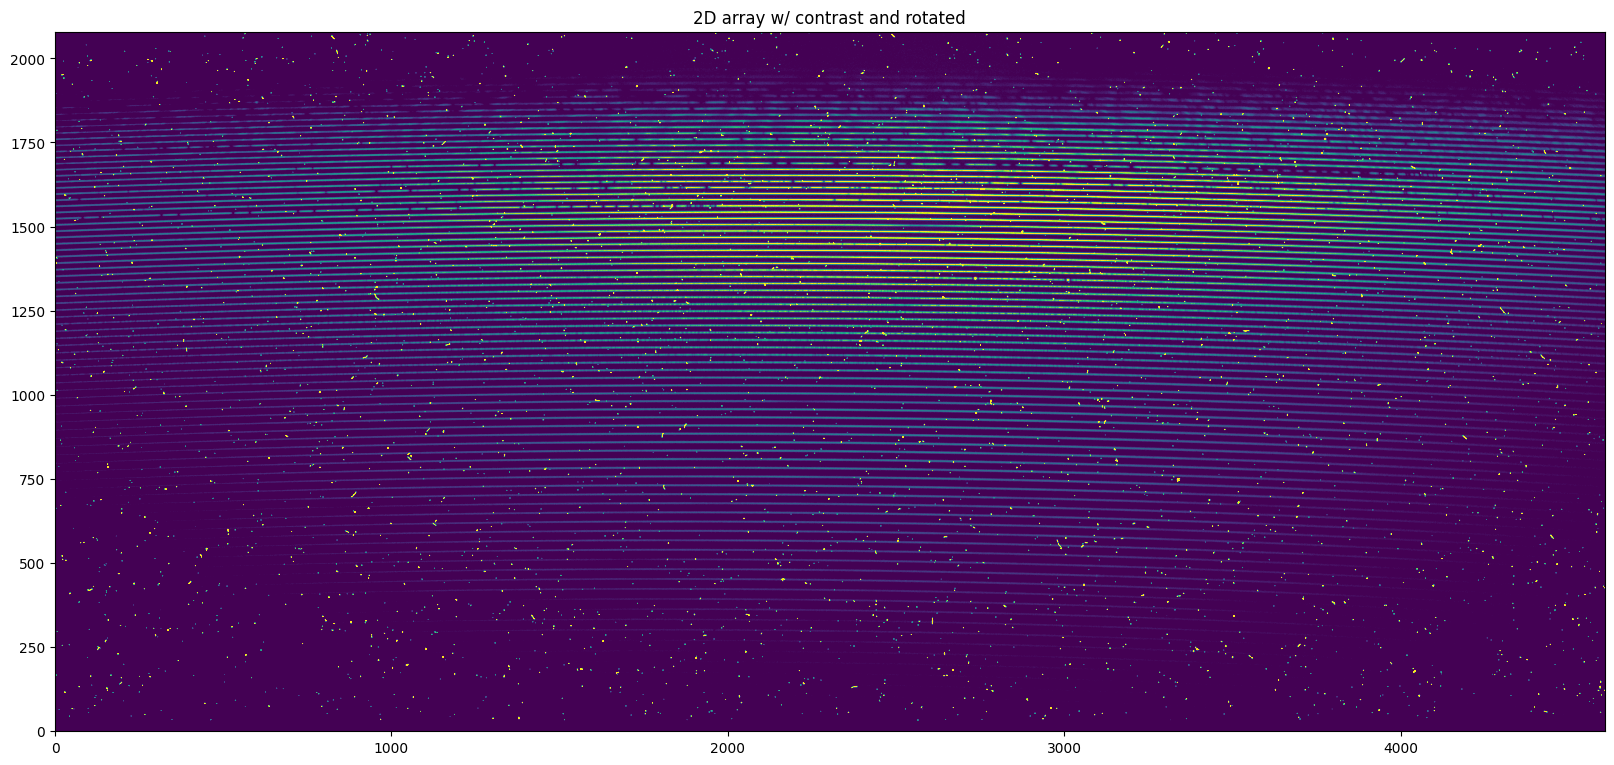

In [29]:
image_rot = np.rot90(image)
plt.figure(figsize=(20,20))
plt.imshow(image_rot, vmin = np.median(image_rot), vmax = np.median(image_rot) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated')

Text(0.5, 1.0, '2D array w/ contrast and rotated AND flipped')

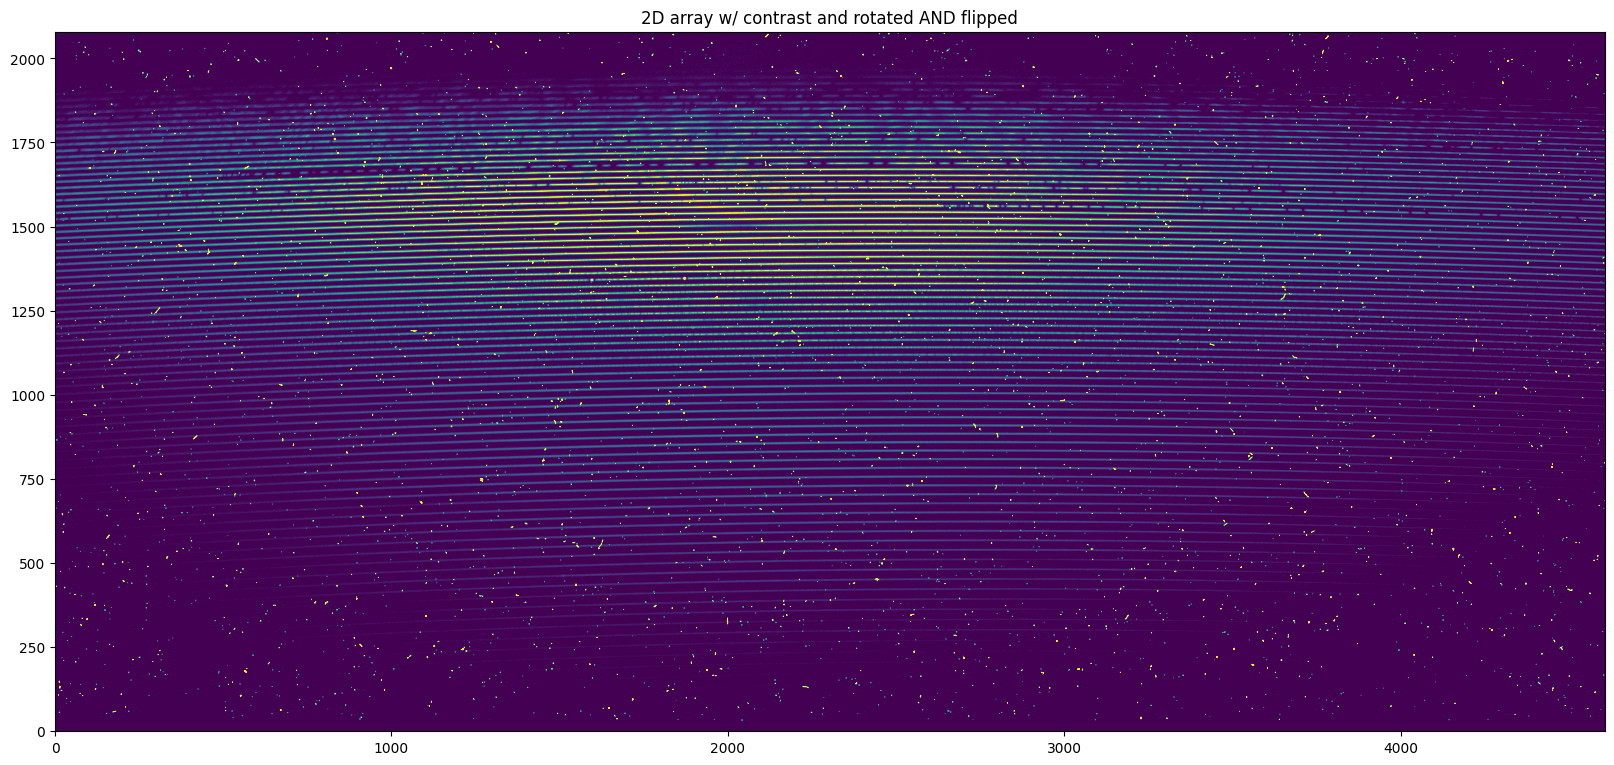

In [30]:
image_flip = np.fliplr(image_rot)
plt.figure(figsize=(20,20))
plt.imshow(image_flip, vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('2D array w/ contrast and rotated AND flipped')

Text(0.5, 1.0, 'Final 2D array (Our Spectrum!)')

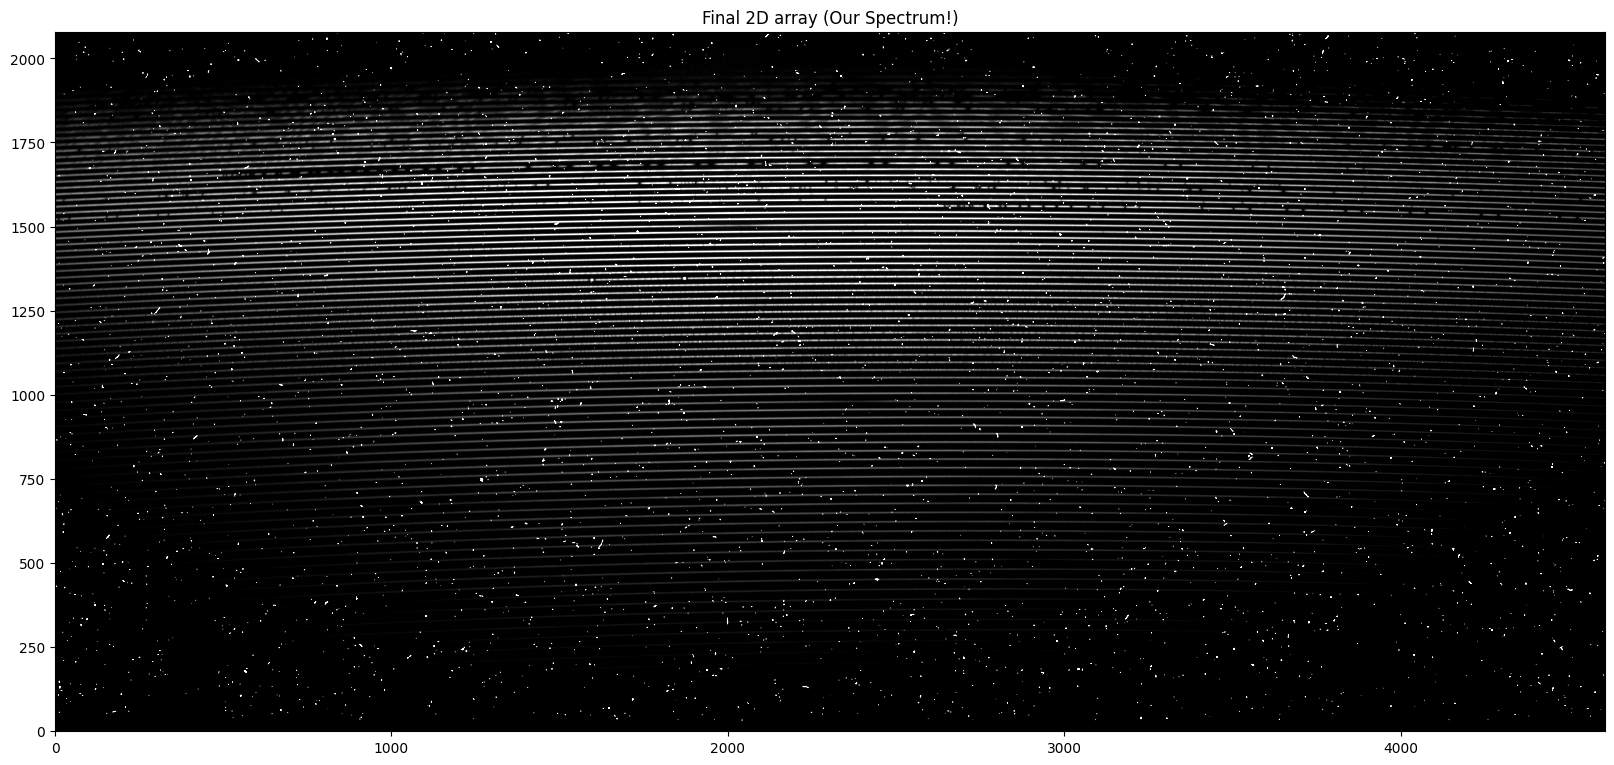

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(image_flip, cmap = 'gray',
           vmin = np.median(image_flip), vmax = np.median(image_flip) * 1.2, origin = 'lower')
plt.title('Final 2D array (Our Spectrum!)')

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

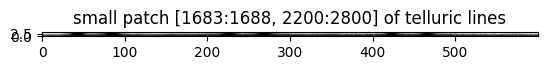

In [32]:
patch = image_flip[1683:1688, 2200:2800]
# ^ Cutout of our 2D array, like a patch out of a quilt
plt.imshow(patch, cmap = 'gray',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2,
           origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

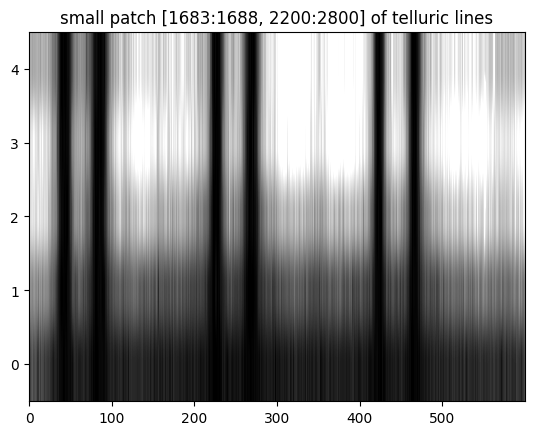

In [33]:
plt.imshow(image_flip[1683:1688, 2200:2800], cmap = 'gray', aspect = 'auto',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

Text(0.5, 1.0, 'small patch [1683:1688, 2200:2800] of telluric lines')

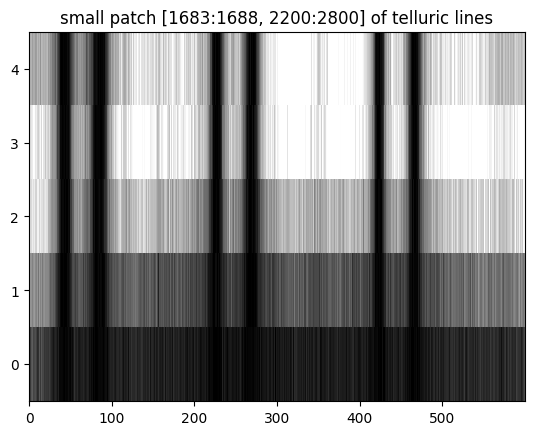

In [34]:
plt.imshow(image_flip[1683:1688, 2200:2800], cmap = 'gray', aspect = 'auto',
           interpolation = 'nearest', vmin = np.median(image_flip),
           vmax = np.median(image_flip) *1.2, origin = 'lower')
plt.title('small patch [1683:1688, 2200:2800] of telluric lines')

In [35]:
patch = image_flip[1683:1688, 2200:2800]
patch.size

3000

In [36]:
telluric_1D = np.sum(patch, axis = 0)

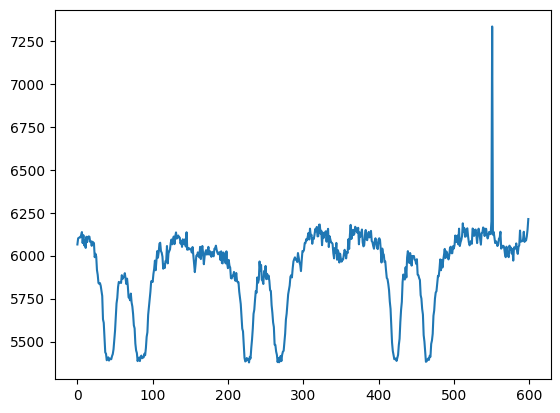

In [37]:
plt.plot(telluric_1D)

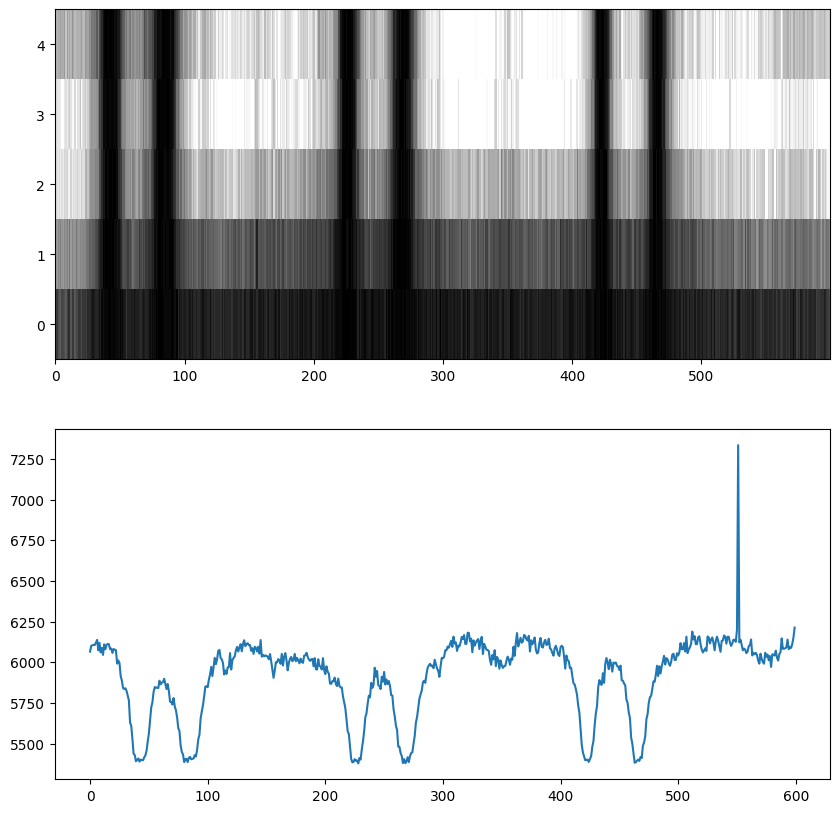

In [38]:
plt.figure(figsize =(10,10))
plt.subplot(2,1,1)
plt.imshow(image_flip[1683:1688,2200:2800], cmap = 'gray', aspect = 'auto',
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)
plt.subplot(2,1,2)
plt.plot(telluric_1D)

In [40]:
bias = np.median(image_flip[-30:])
print(bias)

1073.0


Text(0.5, 1.0, 'Telluric Absorption (Adjusted) [1683:1688, 2200:2800]')

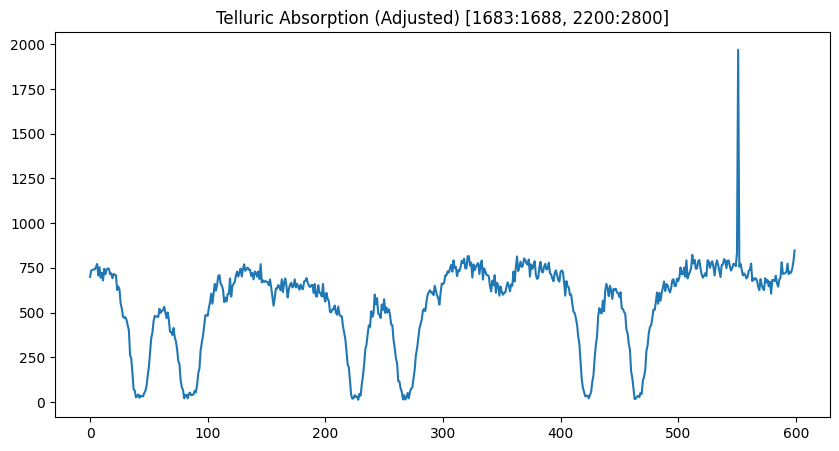

In [41]:
plt.figure(figsize=(10,5))
telluric_1D_adj = telluric_1D - (5*bias)
plt.plot(telluric_1D_adj)
plt.title('Telluric Absorption (Adjusted) [1683:1688, 2200:2800]')

In [42]:
def cut_n_zoom(x1,x2,y1,y2):
    plt.figure(figsize=(10,10))
    plt.imshow(image_flip[x1:x2, y1:y2], cmap = 'gray', aspect = 'auto',
               vmin = np.median(image), vmax = np.median(image) *1.2, origin = 'lower')
    plt.show()

In [43]:
#cutting out the patch with the absorption feature
h_alpha_patch = image_flip[1491:1506,1500:2500]
#take the sum along the columns, and subtract 15 biases
h_alpha_patch_1D_without_bias = np.sum(h_alpha_patch, axis = 0) - bias*15

Text(0.5, 1.0, 'H-alpha')

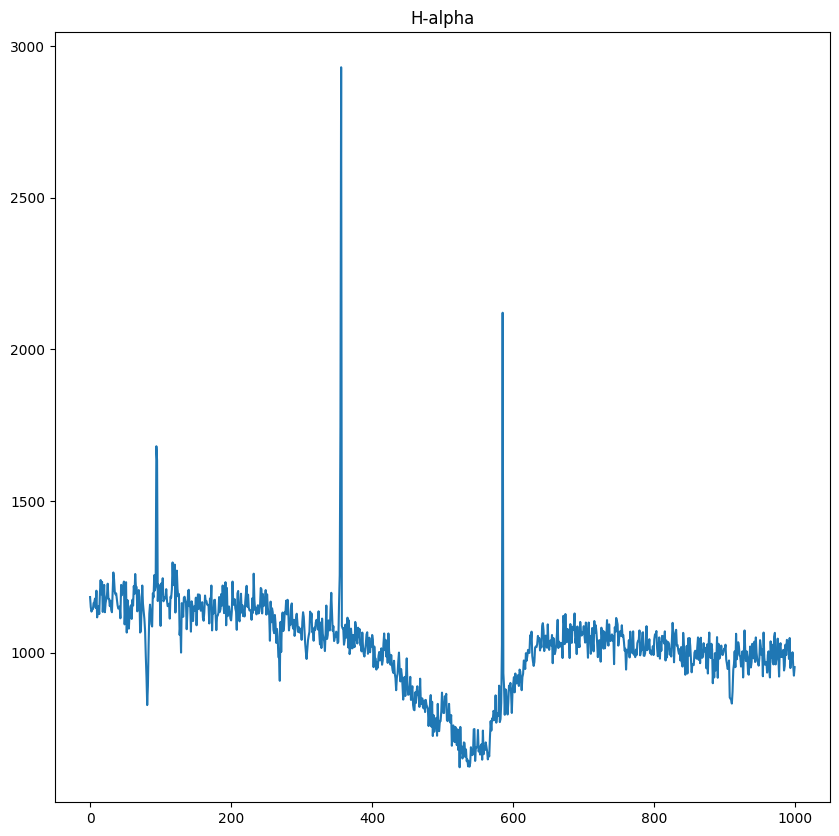

In [44]:
# Plotting H-alpha absorption line
plt.figure(figsize=(10,10))
plt.plot(np.sum(h_alpha_patch, axis = 0) - bias*15)
plt.title('H-alpha')

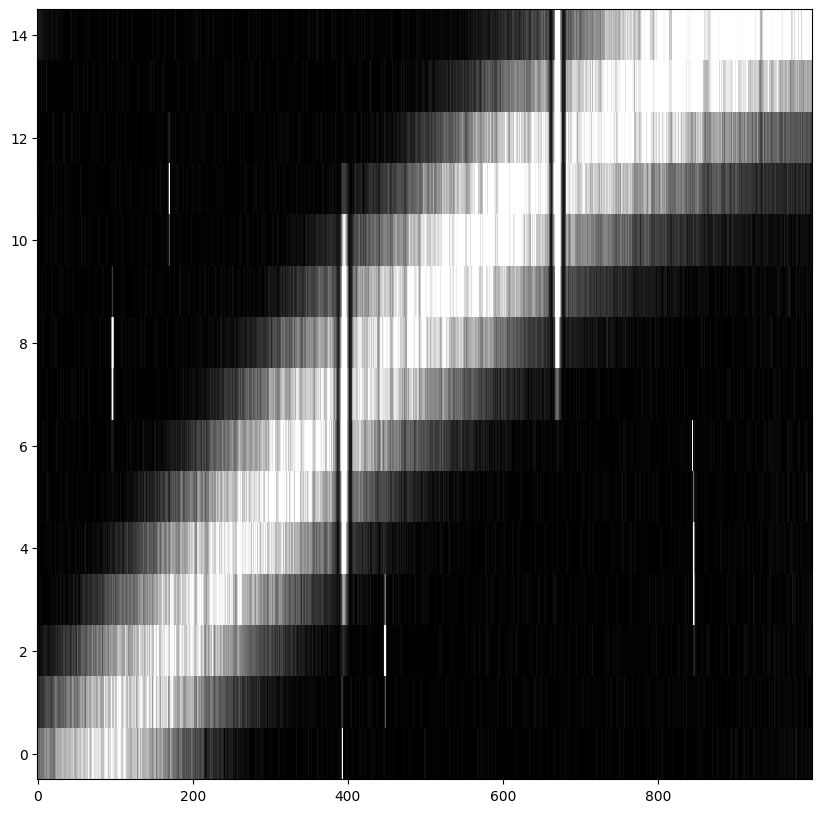

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(image_flip[1333:1348,1200:2200], cmap = 'gray', aspect = 'auto',
           interpolation = 'nearest', origin = 'lower',
           vmin = np.median(image_flip), vmax = np.median(image_flip) *1.2)

Text(0.5, 1.0, 'Na-D lines')

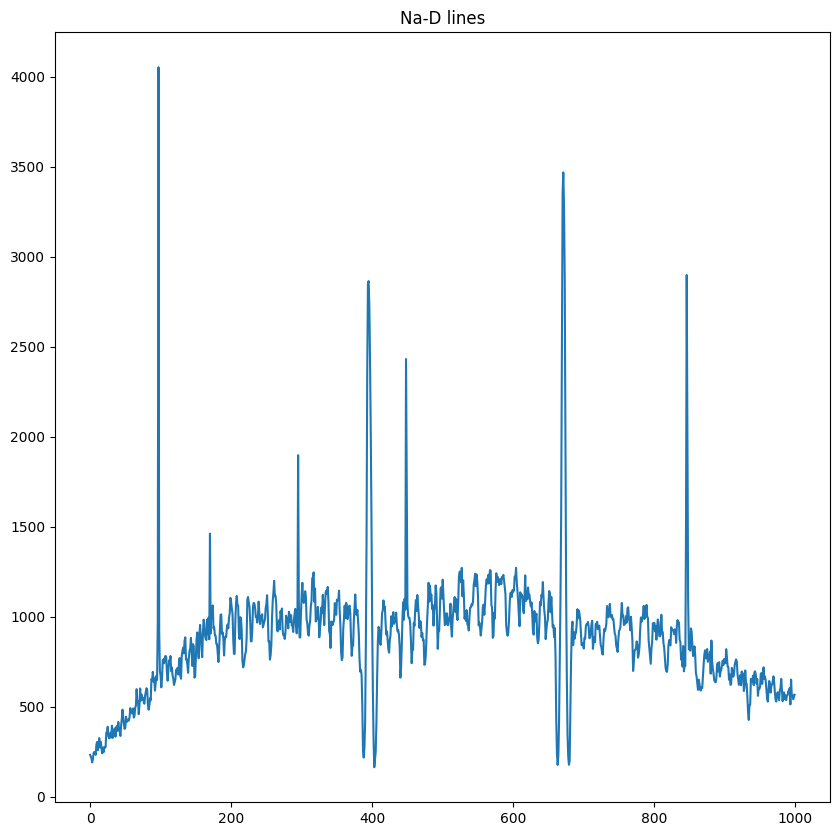

In [46]:
Na_D_patch = image_flip[1333:1348, 1200:2200]
Na_D_patch_1D = np.sum(Na_D_patch, axis = 0) - bias*15
plt.figure(figsize=(10,10))
plt.plot(Na_D_patch_1D)
plt.title('Na-D lines')

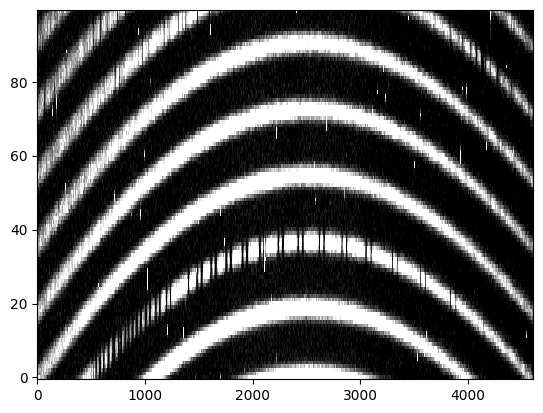

In [47]:
plt.imshow(image_flip[1650:1750], aspect = 'auto', origin = 'lower', cmap = "gray",
           interpolation = 'nearest', vmin = np.median(image_flip), vmax = np.median(image_flip) *1.1)

Whereas the raw data array has dimensions 2080 pixels by 4608 pixels,
this reduced data array has dimensions 4608 pixels by 2080 pixels.


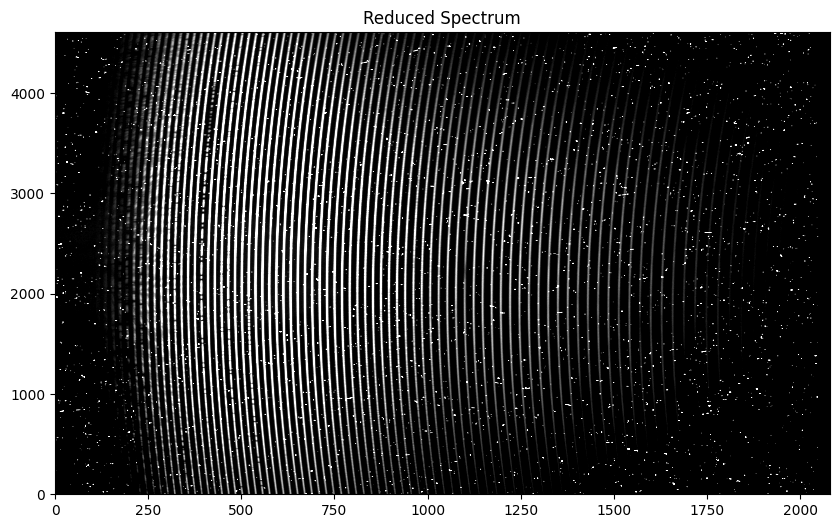

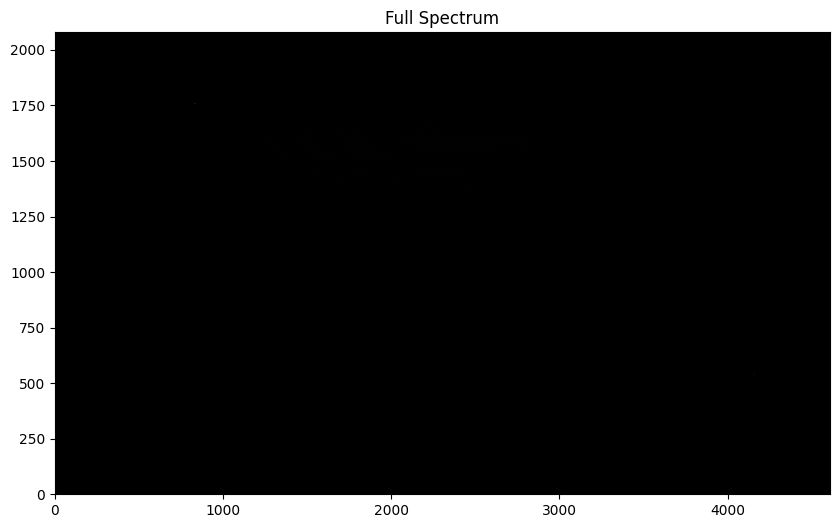

In [55]:
#Load the reduced .fits file and extracting the data
apf_reduced = pf.open('/content/ucb-amp194.fits copy')
reduced_image_fits = apf_reduced[0].data
#Plot an image of the reduced data
plt.figure(figsize=(10,6))
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower", aspect = "auto",
           vmin = np.median(reduced_image_fits), vmax = np.median(reduced_image_fits) *1.1)
plt.title("Reduced Spectrum")
#Plot an image of the raw data
plt.figure(figsize=(10,6))
plt.imshow(image_flip, cmap = "gray", origin = "lower", aspect = "auto")
plt.title("Full Spectrum")
print ("Whereas the raw data array has dimensions %s pixels by %s pixels," % image_flip.shape)
print ("this reduced data array has dimensions %s pixels by %s pixels." % reduced_image_fits.shape)

In [73]:
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

header_reduced = apf_reduced[0].header

print("Reduced - Right Ascension: " + header_reduced['RA'])
print("Reduced - Declination: " + header_reduced['DEC'])
print("Reduced - Target Object: " + header_reduced['TOBJECT'])

Right Ascension: 20:06:15.5
Declination:  44:27:24.6
Target Object: KIC8462852
Reduced - Right Ascension: 20:06:15.5
Reduced - Declination:  44:27:24.6
Reduced - Target Object: KIC8462852


In [75]:
text = open('/content/order_coefficients copy.txt', "r")
lines = text.read().splitlines()
print(lines[0])

      103.686    0.0725580 -1.27386e-05 -1.01114e-10  2.53449e-14


In [76]:
import astropy.io.fits as pf

# Open the FITS file
apf_reduced = pf.open('/content/ucb-amp194.fits copy')

# Access the header of the first HDU (Header Data Unit)
header = apf_reduced[0].header

# Print the entire header
print(header)

# Or, print specific header keywords
print("Right Ascension: " + header['RA'])
print("Declination: " + header['DEC'])
print("Target Object: " + header['TOBJECT'])

SIMPLE  =                    T / NORMAL FITS IMAGE                              BITPIX  =                   16 / DATA PRECISION                                 NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     NAXIS1  =                 2080 / NUMBER OF COLUMNS                              NAXIS2  =                 4608 / NUMBER OF ROWS                                 CRVAL1U =                    0 / COLUMN ORIGIN                                  CRVAL2U =                    0 / ROW ORIGIN                                     CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        CDELT2U =                    1 / ROW CHANGE PER PIXEL                           OBSNUM  =                  194 / OBSERVATION NUMBER                             IDNUM   =                    3 / IMAGE ID                                       UGEOM   =                    1 / UCAM READOUT GEOMETRY                          DGEOM   =                    1 / DESCRAM

In [77]:
import astropy.io.fits as pf

# Open the FITS file in binary mode ('rb')
with open('/content/ucb-amp194.fits copy', 'rb') as f:
    # Read the binary data
    fits_data = f.read()

# You can't directly use readlines() on binary data
# Instead, use astropy.io.fits to parse the FITS file
apf_reduced = pf.open('/content/ucb-amp194.fits copy')
header = apf_reduced[0].header

# Now you can access header information
a0 = float(header.get('A0', 0.0))  # Use .get() with a default value to handle missing keywords
a1 = float(header.get('A1', 0.0))
a2 = float(header.get('A2', 0.0))
a3 = float(header.get('A3', 0.0))
a4 = float(header.get('A4', 0.0))
print(a0, a1, a2, a3, a4)

0.0 0.0 0.0 0.0 0.0


In [78]:
coeff_array = np.zeros((79,5))

In [79]:
for i in range(len(lines)):
    a0 = float(lines[i][6:13].strip())
    a1 = float(lines[i][17:26].strip())
    a2 = float(lines[i][27:39].strip())
    a3 = float(lines[i][40:52].strip())
    a4 = float(lines[i][54:].strip())
    coeffs_one_line = np.array([a0,a1,a2,a3,a4])
    coeff_array[i] += coeffs_one_line

Text(0.5, 1.0, 'Raw image with polynomial functions overplotted')

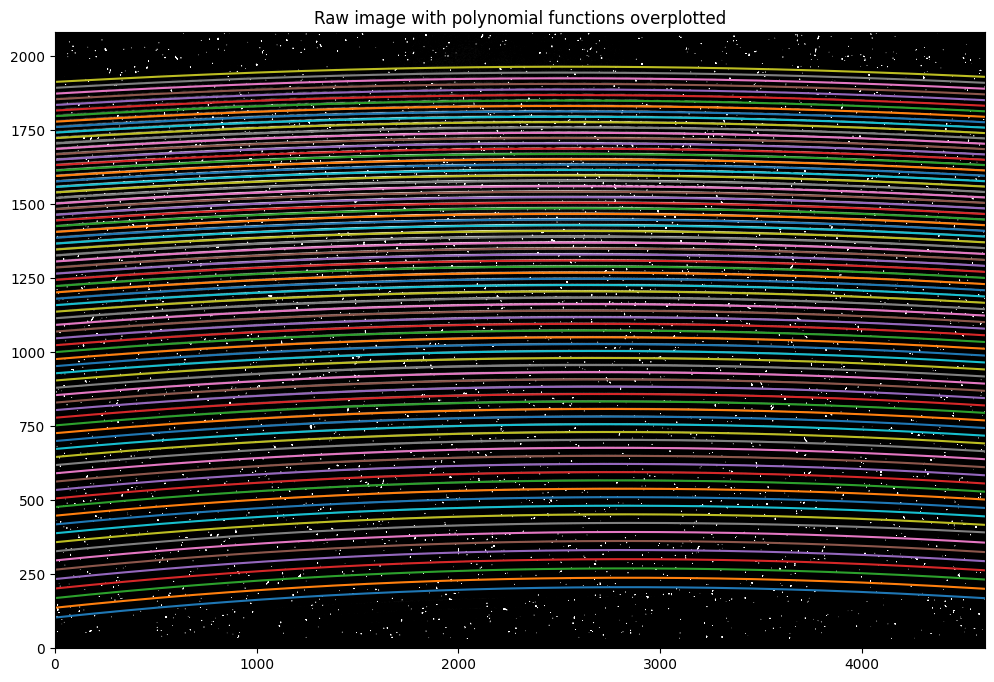

In [80]:
#Plots raw image
plt.figure(figsize=(12,8))
plt.imshow(image_flip, cmap = "gray", origin = "lower",
        aspect = "auto", vmin = np.median(image_flip),
        vmax = np.median(image_flip) *1.1)
#Sets array of x values, which the polynomials can then be plotted with
x = np.arange(0,4608)
#Plots each polynomial function over the raw image
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    #Plots each order of coefficients to fit a fourth-degree polynomial
    plt.plot(x, a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4)
    #Sets the limit on the x-axis and the y-axis shown in the plots
    plt.xlim(0,4608)
    plt.ylim(0,2080)
plt.title("Raw image with polynomial functions overplotted")

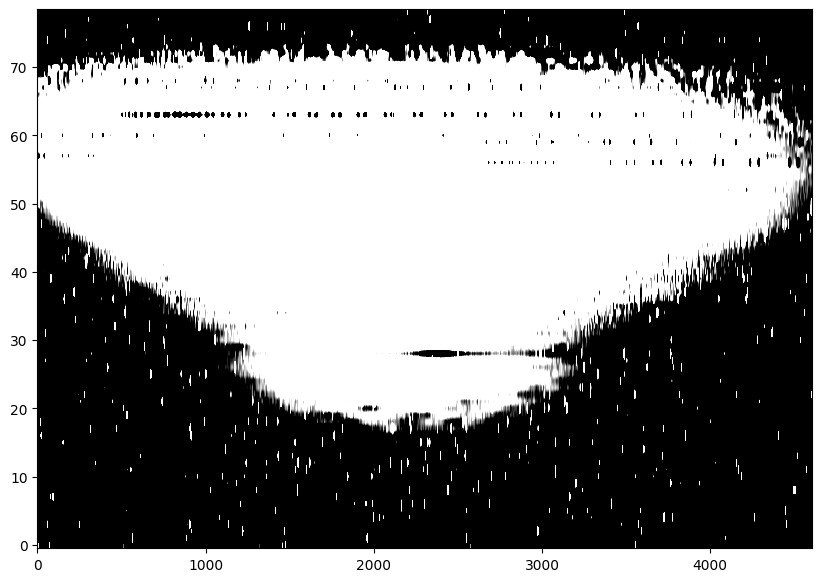

In [81]:
#Array of increasing x values
x = np.arange(0, 4608).astype(float)
#Empty array to fill in with y values from polynomials
y_values = np.zeros((79,4608))
#Empty array to fill in to create our reduced spectrum
poly_reduced_image = np.zeros((79,4608))
#Iteration loop that adds y values to the y_values array and
#adds pixel values to the reduced_image array
for i in range(coeff_array[:,0].size):
    a0 = coeff_array[i,0]
    a1 = coeff_array[i,1]
    a2 = coeff_array[i,2]
    a3 = coeff_array[i,3]
    a4 = coeff_array[i,4]
    for j in range(x.size):
        y = a0 + a1*x[j] + a2*x[j]**2 + a3*x[j]**3 + a4*x[j]**4
        y_values[i,j] = y
        y = int(round(y))
        #We sum the pixel with three pixels above and three pixels below to ensure that
        #we're including all of the important pixels in our reduced image
        poly_reduced_image[i,j] = int(np.sum(image_flip[y-3:y+4,j],
            axis = 0)-7*bias)
plt.figure(figsize=(10,7))
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower",
    aspect = "auto", vmin = np.median(poly_reduced_image),
    vmax = np.median(poly_reduced_image) *1.1)

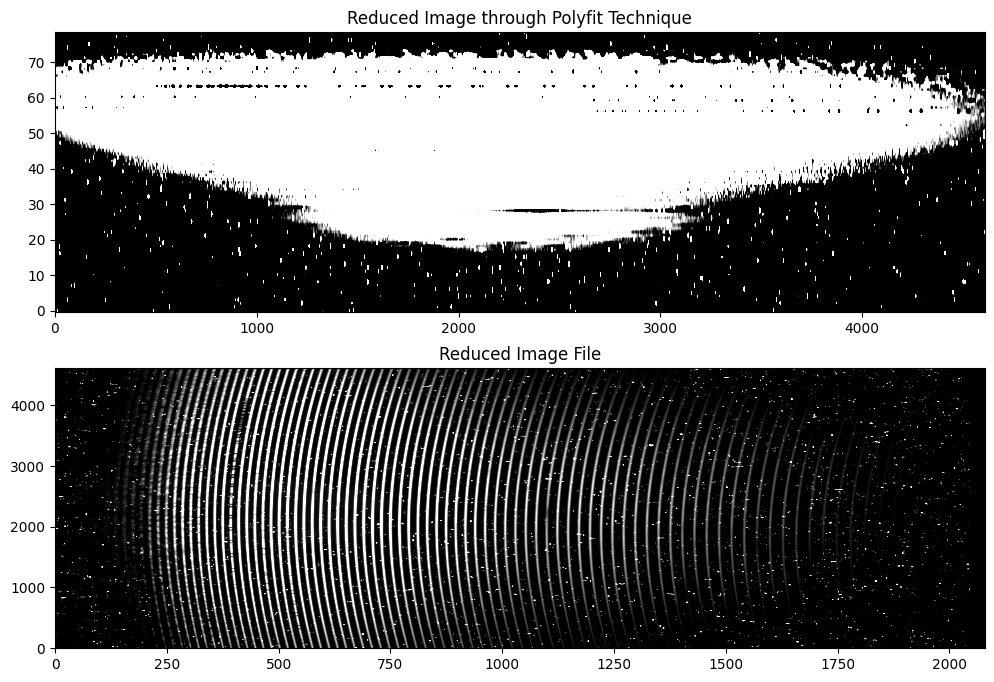

In [82]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.imshow(poly_reduced_image, cmap = "gray", origin = "lower",
    aspect = "auto", vmin = np.median(poly_reduced_image),
    vmax = np.median(poly_reduced_image) *1.1)
plt.title("Reduced Image through Polyfit Technique")
plt.subplot(2, 1, 2)
plt.title("Reduced Image File")
plt.imshow(reduced_image_fits, cmap = "gray", origin = "lower",
    aspect = "auto", vmin = np.median(reduced_image_fits),
    vmax = np.median(reduced_image_fits) *1.1)

In [84]:
print(poly_reduced_image[53,2000])
print(reduced_image_fits[53,2000])

719.0
1066


Text(0.5, 1.0, 'Reduced Image File H-alpha')

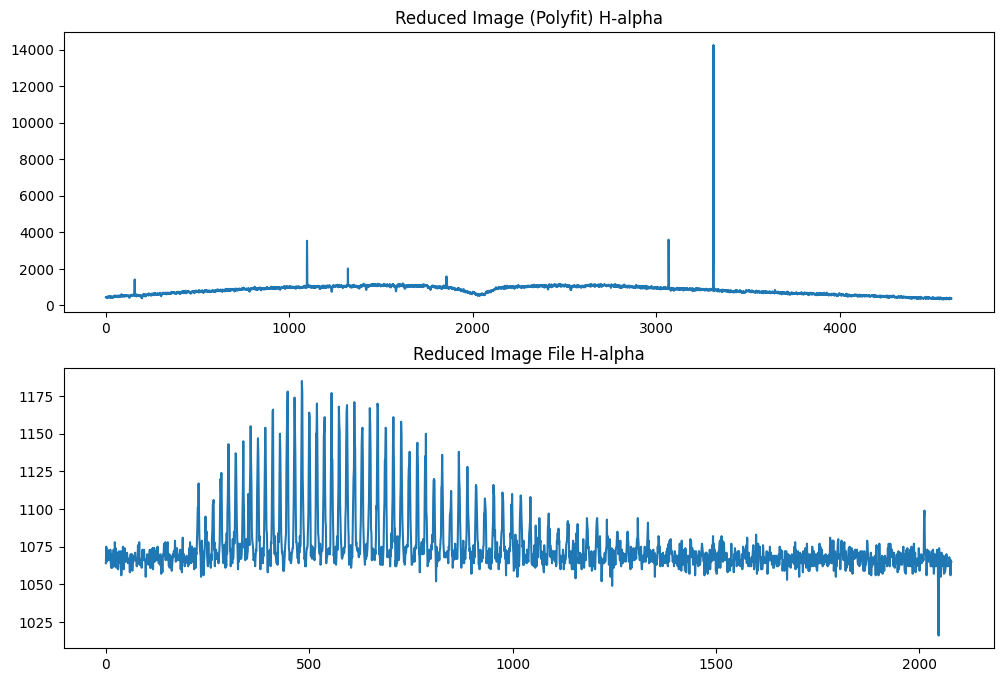

In [85]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(poly_reduced_image[53])
plt.title("Reduced Image (Polyfit) H-alpha")

plt.subplot(2, 1, 2)
plt.plot(reduced_image_fits[53])
plt.title("Reduced Image File H-alpha")

Text(0.5, 1.0, 'Reduced Image File H-alpha')

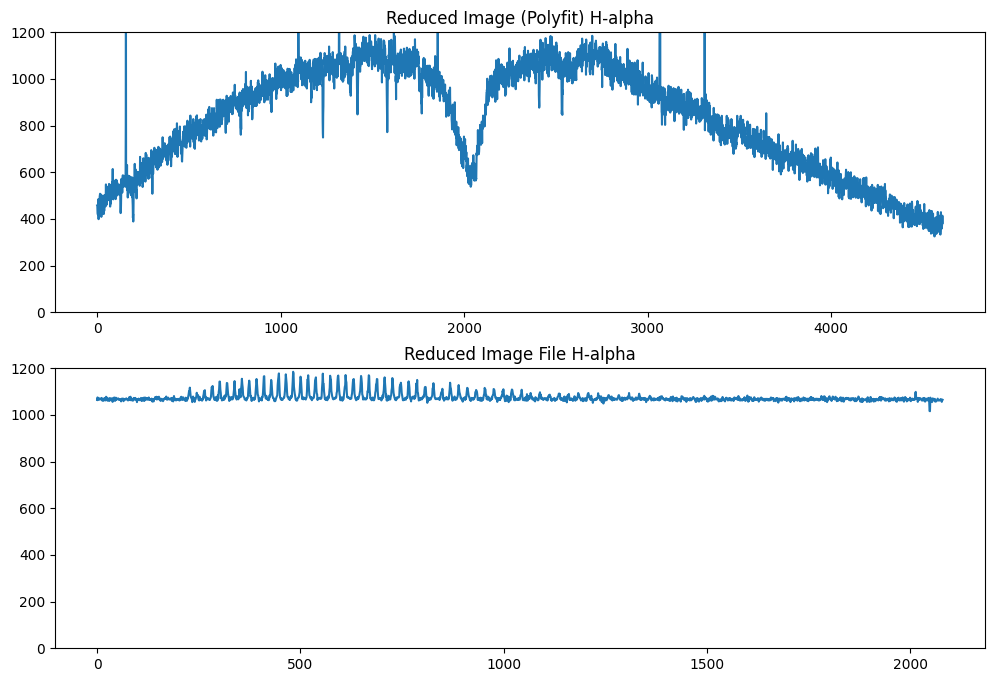

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(poly_reduced_image[53])
plt.ylim(0,1200)
plt.title("Reduced Image (Polyfit) H-alpha")

plt.subplot(2, 1, 2)
plt.plot(reduced_image_fits[53])
plt.ylim(0,1200)
plt.title("Reduced Image File H-alpha")

In [87]:
from lmfit.models import GaussianModel

In [88]:
wave = pf.open('/content/apf_wave.fits copy')
wave_values = wave[0].data

In [89]:
x = wave_values[53,0:4000]
y = poly_reduced_image[53,0:4000]

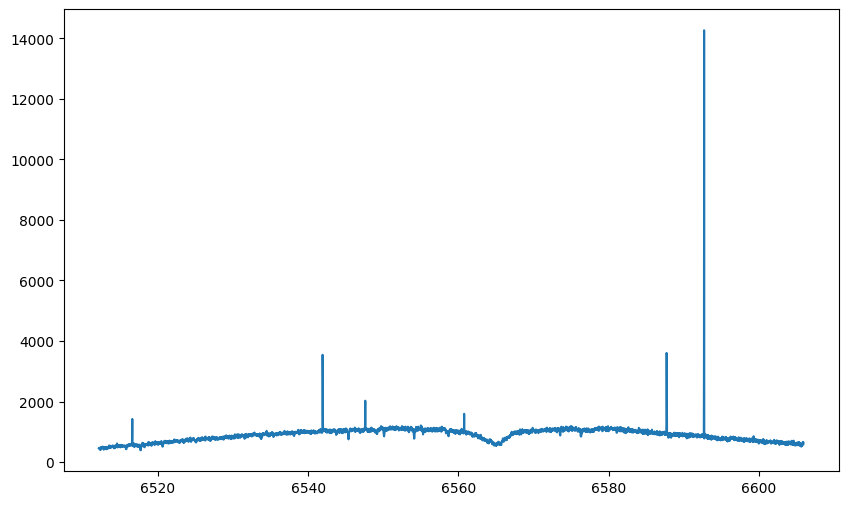

In [90]:
plt.figure(figsize=(10,6))
plt.plot(x,y)

In [91]:
wave_h_alpha = wave_values[53,1942-500:1942+500]

In [92]:
reduced_h_alpha = poly_reduced_image[53,1942-500:1942+500]

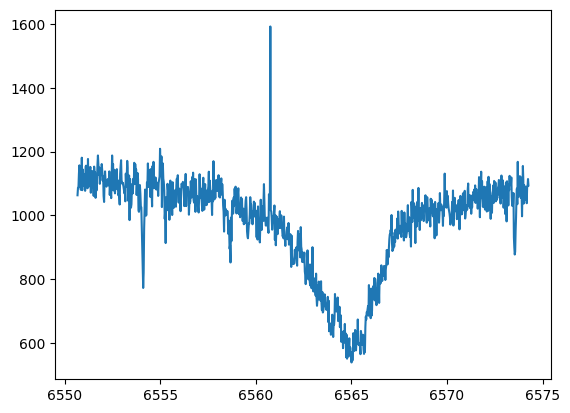

In [93]:
plt.plot(wave_h_alpha,reduced_h_alpha)

In [95]:
left_median = np.median(reduced_h_alpha[0:50])
right_median = np.median(reduced_h_alpha[-50:])
median = (right_median + left_median)/2
print(median)

1098.0


In [96]:
reduced_h_alpha_shifted = (reduced_h_alpha / median) - 1

In [97]:
x = wave_h_alpha
y = reduced_h_alpha_shifted

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 108
    # data points      = 1000
    # variables        = 3
    chi-square         = 2.95872347
    reduced chi-square = 0.00296763
    Akaike info crit   = -5816.99736
    Bayesian info crit = -5802.27410
    R-squared          = 0.84134401
[[Variables]]
    amplitude: -2.26529987 +/- 0.02847756 (1.26%) (init = 33.94961)
    center:     6564.68495 +/- 0.03189693 (0.00%) (init = 6559.001)
    sigma:      2.19675368 +/- 0.03189422 (1.45%) (init = 11.77778)
    fwhm:       5.17295951 +/- 0.07510516 (1.45%) == '2.3548200*sigma'
    height:    -0.41139066 +/- 0.00517267 (1.26%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.5773
Center at 6564.684951020046 Angstroms for our created reduced image.


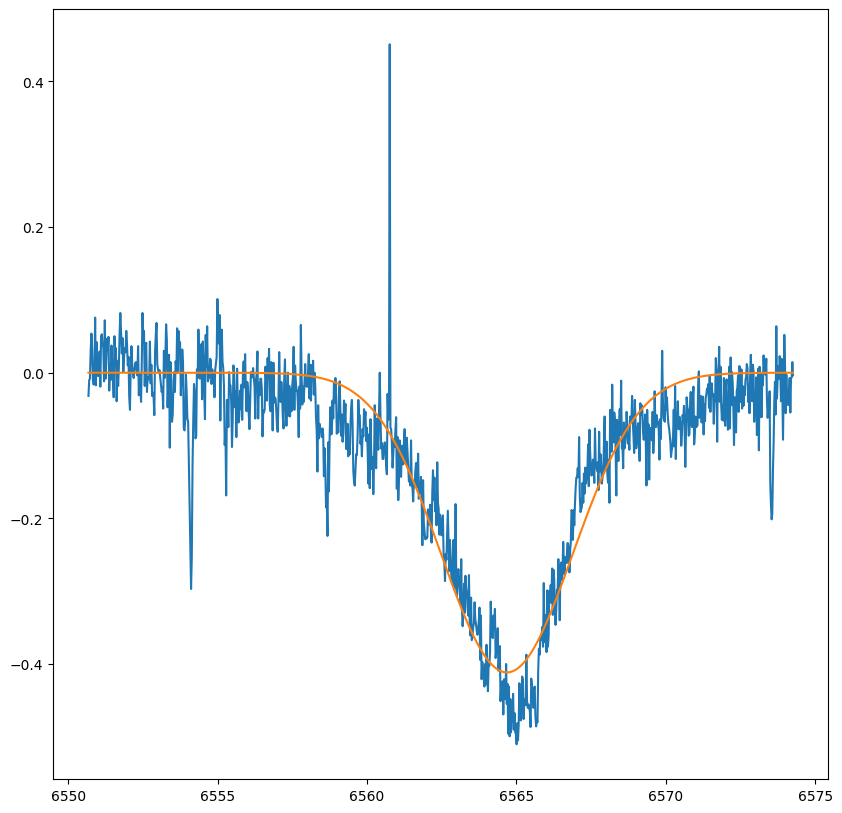

In [99]:
mod = GaussianModel()
pars = mod.guess(y,x=x)
out = mod.fit(y, pars, x=x)
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.plot(x, out.best_fit)
print(out.fit_report())
print('Center at ' + str(out.best_values['center']) + ' Angstroms for our created reduced image.')

In [101]:
reduced_image_provided_h_alpha = reduced_image_fits[53,1942-500:1942+500]
left_median = np.median(reduced_image_provided_h_alpha[0:50])
right_median = np.median(reduced_image_provided_h_alpha[-50:])
median = (right_median + left_median)/2
print(median)

1065.75


In [102]:
reduced_provided_h_alpha_shifted = (reduced_image_provided_h_alpha / median) - 1
x = wave_h_alpha
y = reduced_provided_h_alpha_shifted

In [109]:
import numpy as np
from lmfit.models import GaussianModel
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are defined as in your code
# ...

# Ensure x and y are numpy arrays and have the same length
x = np.asarray(x)
y = np.asarray(y)

if len(x) != len(y):
    print("Error: x and y arrays must have the same length.")
    # Handle the length mismatch, perhaps by truncating the longer array
else:
    mod = GaussianModel()
    pars = mod.guess(y, x=x)
    out = mod.fit(y, pars, x=x)
    plt.figure(figsize=(10,10))
    plt.plot(x, y)
    plt.plot(x, out.best_fit)
    print(out.fit_report(min_correl = 0.25))
    print('Center at ' + str(out.best_values['center']) + ' Angstroms for the reduced image we were provided.')

Error: x and y arrays must have the same length.


In [110]:
print(wave_h_alpha.shape)
print(reduced_provided_h_alpha_shifted.shape)

(1000,)
(638,)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 638
    # variables        = 3
    chi-square         = 0.02050021
    reduced chi-square = 3.2284e-05
    Akaike info crit   = -6594.52995
    Bayesian info crit = -6581.15494
    R-squared          = 0.01529857
[[Variables]]
    amplitude:  0.03404379 +/- 0.03705007 (108.83%) (init = 1.791055)
    center:     6550.89007 +/- 8.69172312 (0.13%) (init = 6558.363)
    sigma:      7.01871566 +/- 5.60996275 (79.93%) (init = 7.665932)
    fwhm:       16.5278120 +/- 13.2104525 (79.93%) == '2.3548200*sigma'
    height:     0.00193504 +/- 7.4279e-04 (38.39%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, center) = -0.9774
    C(amplitude, sigma)  = +0.9633
    C(center, sigma)     = -0.9402
Center at 6550.890069613097 Angstroms for the reduced image we were provided.


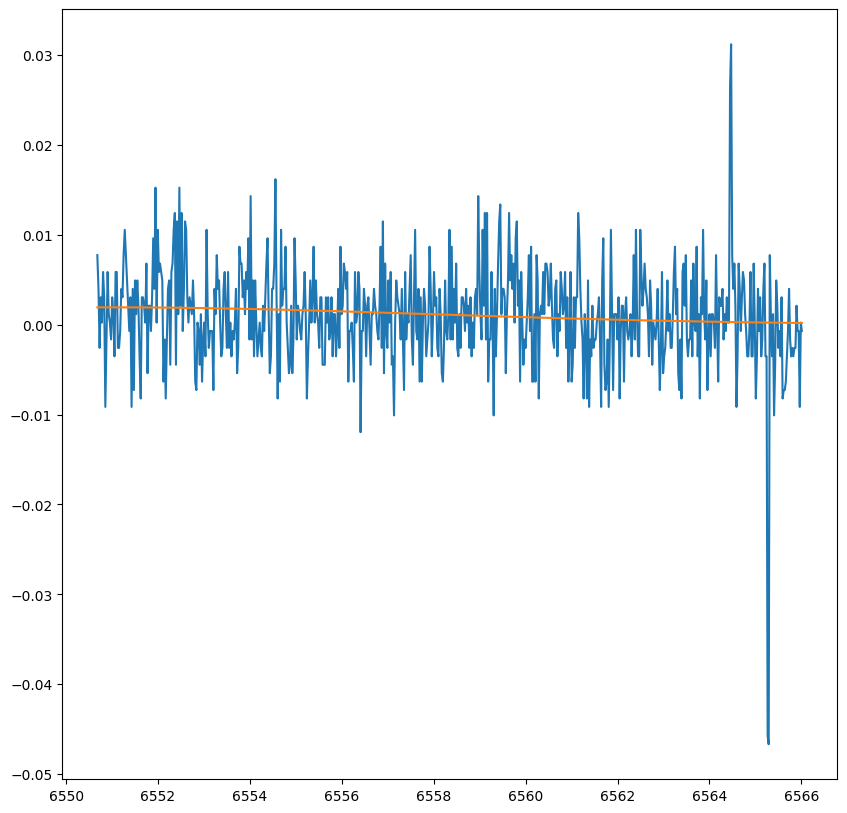

In [111]:
x = wave_h_alpha[:len(reduced_provided_h_alpha_shifted)]  # Truncate wave_h_alpha
y = reduced_provided_h_alpha_shifted

mod = GaussianModel()
pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.plot(x, out.best_fit)
print(out.fit_report(min_correl = 0.25))
print('Center at ' + str(out.best_values['center']) + ' Angstroms for the reduced image we were provided.')

In [112]:
def cosmic_ray_spot(patch_1D):
    plt.figure(figsize=(10,10))
    plt.plot(patch_1D, color = 'b')
    for i in range(5, patch_1D.size - 5):
        if ((patch_1D[i]>patch_1D[i-1]) and (patch_1D[i]>patch_1D[i+1]) and (patch_1D[i]>(bias*1.25))
            and (patch_1D[i-3]<=(bias*1.25)) and (patch_1D[i+3]<=(bias*1.25))):
            half_max = ((patch_1D[i]) + (patch_1D[i+5] + patch_1D[i-5])/2)/2
            left_side = np.where(patch_1D[:i] <= half_max)
            left_mark = left_side[0][-1]
            right_side = np.where(patch_1D[i:] <= half_max)
            right_mark = right_side[0][0] + i
            peak_x = right_mark - ((right_mark - left_mark)/2)
            plt.axvline(x=peak_x, ymin = np.min(patch_1D) - 1000, color = 'r', linestyle = '-.')

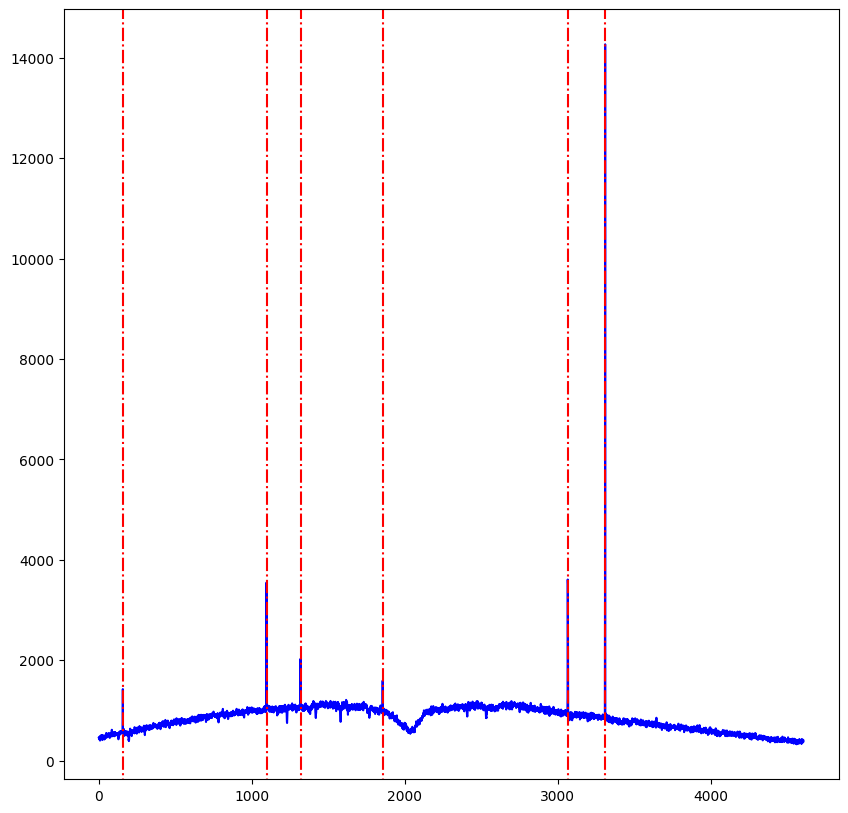

In [113]:
cosmic_ray_spot(poly_reduced_image[53])

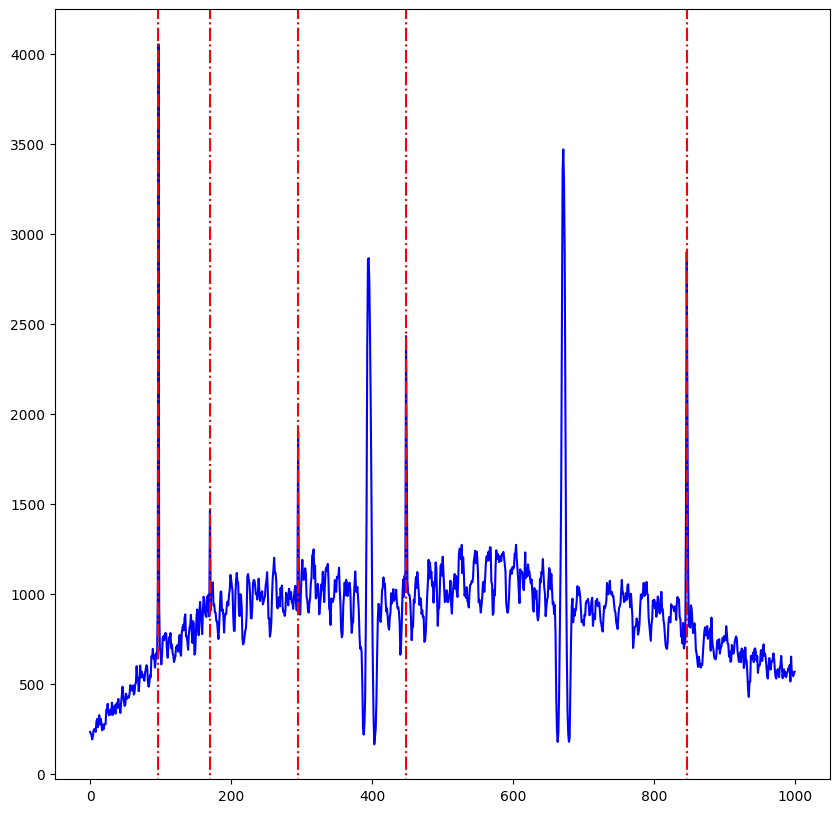

In [114]:
cosmic_ray_spot(Na_D_patch_1D)